In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from MemSE.train_test_loop import test, test_mse_th, test_mse_sim
from MemSE.model_load import load_memristor, find_existing
from MemSE.dataset import get_dataloader
from MemSE.nn import mse_gamma

device = torch.device('cpu')
#torch.autograd.set_detect_anomaly(True)
print(device)

bs = 4
nb_batch = 100 / bs
train_loader, valid_loader, test_loader, nclasses, input_shape = get_dataloader('CIFAR10', bs=bs)
criterion = nn.CrossEntropyLoss().to(device)

models_names = ['smallest_vgg', 'really_small_vgg']

N = 128
SIGMAS = [0.01, 0.1]
POST_PROCS = ['zero_but_diag', None]

[pyKeOps]: Warning, no cuda detected. Switching to cpu only.
cpu
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [9]:
memse = load_memristor(models_names[0], nclasses, 'all', device, input_shape, 0.01, N, gmax=2., post_processing='zero_but_diag')
memse.quant(c_one=True)
mses_diag_001, pow_diag_001 = test_mse_th(test_loader, memse, device, 20)
memse = load_memristor(models_names[0], nclasses, 'all', device, input_shape, 0.1, N, gmax=2., post_processing='zero_but_diag')
memse.quant(c_one=True)
mses_diag_01, pow_diag_01 = test_mse_th(test_loader, memse, device, 20)
memse = load_memristor(models_names[0], nclasses, 'all', device, input_shape, 0.01, N, gmax=2.)
memse.quant(c_one=True)
mses_001, pow_001 = test_mse_th(test_loader, memse, device, 20)
memse = load_memristor(models_names[0], nclasses, 'all', device, input_shape, 0.1, N, gmax=2.)
memse.quant(c_one=True)
mses_01, pow_01 = test_mse_th(test_loader, memse, device, 20)

Loading model checkpoint
Loading model checkpoint
Loading model checkpoint
Loading model checkpoint


## Sigma 0.1

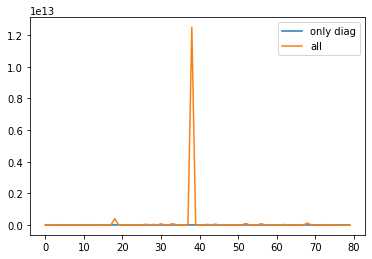

In [15]:
plt.plot(pow_diag_01, label='only diag')
plt.plot(pow_01, label='all')
plt.legend()
plt.show()

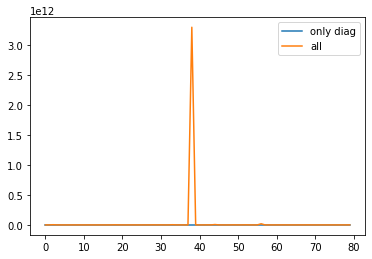

In [17]:
plt.plot(np.array(mses_diag_01).mean(axis=1), label='only diag')
plt.plot(np.array(mses_01).mean(axis=1), label='all')
plt.legend()
plt.show()

## Sigma 0.01

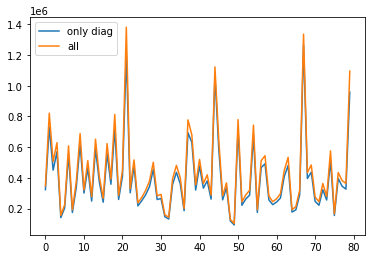

In [16]:
plt.plot(pow_diag_001, label='only diag')
plt.plot(pow_001, label='all')
plt.legend()
plt.show()

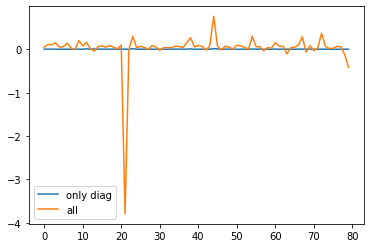

In [18]:
plt.plot(np.array(mses_diag_001).mean(axis=1), label='only diag')
plt.plot(np.array(mses_001).mean(axis=1), label='all')
plt.legend()
plt.show()